In [2]:
#!/usr/bin/env python
# coding: utf-8

# ==================================================================== #
# author: Yung-Hsin Chen                                               #
# copyright: Copyright 2019, Thermal and Statistical Physics Project   #
# credit: Mei-Yan Sam, Sing-Hong Chen                                  #                                              
# ==================================================================== #

# import modules
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math
from pylab import * 

## Upload sequential update data

In [4]:
MC_seq_2_list = np.load('MC_seq_2.npy')
MC_seq_4_list = np.load('MC_seq_4.npy')
MC_seq_8_list = np.load('MC_seq_8.npy')
MC_seq_16_list = np.load('MC_seq_16.npy')
MC_seq_32_list = np.load('MC_seq_32.npy')

### Calculate susceptibility per site $Q \equiv \frac{\chi}{N}$ for $L = 2,4,8,16,32$. For each size $L$, estimate the finite-size critical temperature $T_{max}(L)$ at which $Q$ attends the maximal value $Q_{max}(L)$.

## Find T$_\textbf{c}$

In [7]:
T_c_2 = MC_seq_2_list[0][np.argmax(MC_seq_2_list[4])]
T_c_4 = MC_seq_4_list[0][np.argmax(MC_seq_4_list[4])]
T_c_8 = MC_seq_8_list[0][np.argmax(MC_seq_8_list[4])]
T_c_16 = MC_seq_16_list[0][np.argmax(MC_seq_16_list[4])]
T_c_32 = MC_seq_32_list[0][np.argmax(MC_seq_32_list[4])]

print('Size = 2, T_c = ', T_c_2)
print('Size = 4, T_c = ', T_c_4)
print('Size = 8, T_c = ', T_c_8)
print('Size = 16, T_c = ', T_c_16)
print('Size = 32, T_c = ', T_c_32)

Size = 2, T_c =  3.3000000000000003
Size = 4, T_c =  2.8
Size = 8, T_c =  2.6
Size = 16, T_c =  2.4000000000000004
Size = 32, T_c =  2.3


## T v.s. Q (T interval = 0.02)

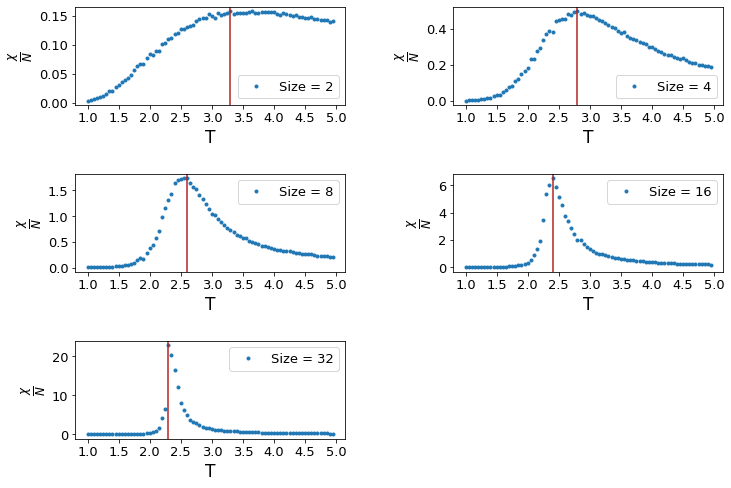

In [8]:
plt.subplot(321)
plt.plot(MC_seq_2_list[0], MC_seq_2_list[4], 'o', markersize = 3, label = 'Size = 2')
plt.axvline(x = T_c_2, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel(r'$\frac{\chi}{N}$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(322)
plt.plot(MC_seq_4_list[0], MC_seq_4_list[4], 'o', markersize = 3, label = 'Size = 4')
plt.axvline(x = T_c_4, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel(r'$\frac{\chi}{N}$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(323)
plt.plot(MC_seq_8_list[0], MC_seq_8_list[4], 'o', markersize = 3, label = 'Size = 8')
plt.axvline(x = T_c_8, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel(r'$\frac{\chi}{N}$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(324)
plt.plot(MC_seq_16_list[0], MC_seq_16_list[4], 'o', markersize = 3, label = 'Size = 16')
plt.axvline(x = T_c_16, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel(r'$\frac{\chi}{N}$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(325)
plt.plot(MC_seq_32_list[0], MC_seq_32_list[4], 'o', markersize = 3, label = 'Size = 32')
plt.axvline(x = T_c_32, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel(r'$\frac{\chi}{N}$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplots_adjust(left = 5, bottom = 5, right = 6.5, top = 6.5, wspace = 0.4, hspace = 0.7)
plt.show()

## ln(L) v.s. ln(Q$_{\textbf{max}}$)

Fitting curve y =  1.806326715466858 x  -3.1520698641183897
slope =  1.806326715466858


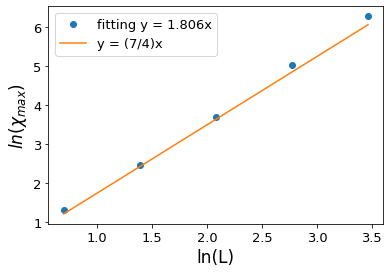

In [9]:
lnL = [np.log(i) for i in [2, 4, 8, 16, 32]]

ln_Q_max_2 = np.log(max(MC_seq_2_list[4]))
ln_Q_max_4 = np.log(max(MC_seq_4_list[4]))
ln_Q_max_8 = np.log(max(MC_seq_8_list[4]))
ln_Q_max_16 = np.log(max(MC_seq_16_list[4]))
ln_Q_max_32 = np.log(max(MC_seq_32_list[4]))

slope, b = polyfit(lnL, [ln_Q_max_2, ln_Q_max_4, ln_Q_max_8, ln_Q_max_16, ln_Q_max_32], 1)
print('Fitting curve y = ', slope, 'x ', b)
print('slope = ', slope)

slope_chi = [7*x/4 for x in lnL]

plt.plot(lnL, [ln_Q_max_2-b, ln_Q_max_4-b, ln_Q_max_8-b, ln_Q_max_16-b, ln_Q_max_32-b], 'o', label = 'fitting y = 1.806x')
plt.plot(lnL, slope_chi, label = 'y = (7/4)x')
plt.xlabel('ln(L)', fontsize = 17)
plt.ylabel(r'$ln(\chi_{max})$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

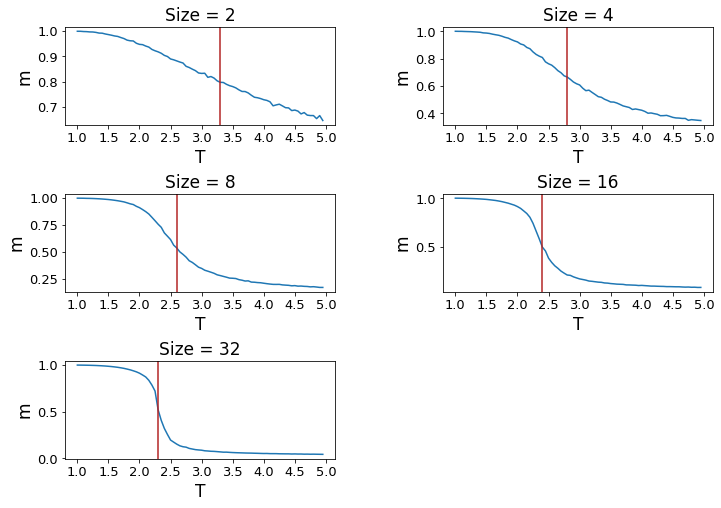

In [49]:
plt.subplot(321)
plt.title('Size = 2', fontsize = 17)
plt.plot(MC_seq_2_list[0], MC_seq_2_list[3])
plt.axvline(x = T_c_2, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel('m', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(322)
plt.title('Size = 4', fontsize = 17)
plt.plot(MC_seq_4_list[0], MC_seq_4_list[3])
plt.axvline(x = T_c_4, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel('m', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(323)
plt.title('Size = 8', fontsize = 17)
plt.plot(MC_seq_8_list[0], MC_seq_8_list[3])
plt.axvline(x = T_c_8, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel('m', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(324)
plt.title('Size = 16', fontsize = 17)
plt.plot(MC_seq_16_list[0], MC_seq_16_list[3])
plt.axvline(x = T_c_16, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel('m', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(325)
plt.title('Size = 32', fontsize = 17)
plt.plot(MC_seq_32_list[0], MC_seq_32_list[3])
plt.axvline(x = T_c_32, color='firebrick')
plt.xlabel('T', fontsize = 17)
plt.ylabel('m', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplots_adjust(left = 5, bottom = 5, right = 6.5, top = 6.5, wspace = 0.4, hspace = 0.7)
plt.show()

m(Tmax) (Size = 2) =  0.79725
m(Tmax) (Size = 4) =  0.6653125
m(Tmax) (Size = 8) =  0.53575
m(Tmax) (Size = 16) =  0.49781328125
m(Tmax) (Size = 32) =  0.51924921875
Fitting curve y =  -0.16556375229133632 x  -0.1779347700747525
slope =  -0.16556375229133632


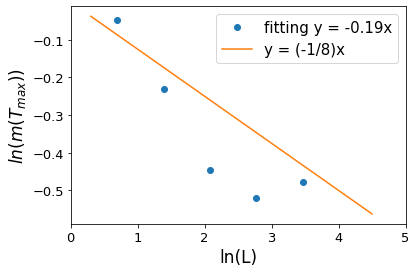

In [57]:
lnM_Tmax_2 = np.log( MC_seq_2_list[3][np.argmax(MC_seq_2_list[4])] )
lnM_Tmax_4 = np.log( MC_seq_4_list[3][np.argmax(MC_seq_4_list[4])] )
lnM_Tmax_8 = np.log( MC_seq_8_list[3][np.argmax(MC_seq_8_list[4])] )
lnM_Tmax_16 = np.log( MC_seq_16_list[3][np.argmax(MC_seq_16_list[4])] )
lnM_Tmax_32 = np.log( MC_seq_32_list[3][np.argmax(MC_seq_32_list[4])] )

T = np.linspace(0.3, 4.5, 10)
slope_m = [(-1/8)*x for x in T]

slope, b = polyfit(lnL, [lnM_Tmax_2, lnM_Tmax_4, lnM_Tmax_8, lnM_Tmax_16, lnM_Tmax_32], 1)
print('Fitting curve y = ', slope, 'x ', b)
print('slope = ', slope)

print('m(Tmax) (Size = 2) = ', MC_seq_2_list[3][np.argmax(MC_seq_2_list[4])])
print('m(Tmax) (Size = 4) = ', MC_seq_4_list[3][np.argmax(MC_seq_4_list[4])])
print('m(Tmax) (Size = 8) = ', MC_seq_8_list[3][np.argmax(MC_seq_8_list[4])])
print('m(Tmax) (Size = 16) = ', MC_seq_16_list[3][np.argmax(MC_seq_16_list[4])])
print('m(Tmax) (Size = 32) = ', MC_seq_32_list[3][np.argmax(MC_seq_32_list[4])])

plt.plot(lnL, [lnM_Tmax_2-b, lnM_Tmax_4-b, lnM_Tmax_8-b, lnM_Tmax_16-b, lnM_Tmax_32-b], 'o', label = 'fitting y = -0.19x')
plt.plot(T, slope_m, label = 'y = (-1/8)x')
plt.xlabel('ln(L)', fontsize = 17)
plt.ylabel( r'$ln(m(T_{max}))$', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(0, 5)

plt.legend(loc = 'best', fontsize = 15)
plt.show()

## Data Collapse

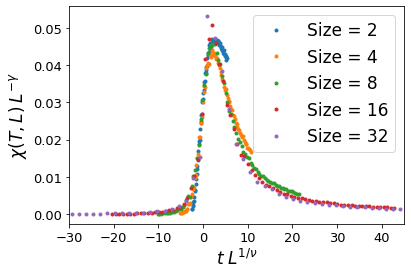

tL(max) =  2.0616293715739564


In [70]:
Tc_exact = 2/(np.log(1+2**(1/2)))

Q_times_L_2 = [i*2**(-(7/4)) for i in MC_seq_2_list[4]]
Q_times_L_4 = [i*4**(-(7/4)) for i in MC_seq_4_list[4]]
Q_times_L_8 = [i*8**(-(7/4)) for i in MC_seq_8_list[4]]
Q_times_L_16 = [i*16**(-(7/4)) for i in MC_seq_16_list[4]]
Q_times_L_32 = [i*32**(-(7/4)) for i in MC_seq_32_list[4]]

T_times_L_2 = [(i-Tc_exact)*2 for i in MC_seq_2_list[0]]
T_times_L_4 = [(i-Tc_exact)*4 for i in MC_seq_2_list[0]]
T_times_L_8 = [(i-Tc_exact)*8 for i in MC_seq_2_list[0]]
T_times_L_16 = [(i-Tc_exact)*16 for i in MC_seq_2_list[0]]
T_times_L_32 = [(i-Tc_exact)*32 for i in MC_seq_2_list[0]]

plt.plot(T_times_L_2, Q_times_L_2, 'o', markersize = 3, label = 'Size = 2')
plt.plot(T_times_L_4, Q_times_L_4, 'o', markersize = 3, label = 'Size = 4')
plt.plot(T_times_L_8, Q_times_L_8, 'o', markersize = 3, label = 'Size = 8')
plt.plot(T_times_L_16, Q_times_L_16, 'o', markersize = 3, label = 'Size = 16')
plt.plot(T_times_L_32, Q_times_L_32, 'o', markersize = 3, label = 'Size = 32')
plt.xlabel(r'$t\;L^{1/\nu}$', fontsize = 17)
plt.ylabel( r'$\chi(T, L)\: L^{-\gamma}$', fontsize = 17)
plt.legend(loc = 'best', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(-30, 45)
plt.show()

print('tL(max) = ', T_times_L_2[np.argmax(Q_times_L_2)])

### Calculate heat capacity per site $Q \equiv \frac{C}{N}$ for $L = 2,4,8,16,32$. For each size $L$, estimate the finite-size critical temperature $T_{max}(L)$ at which $Q$ attends the maximal value $Q_{max}(L)$.

## Find T$_{\textbf{c}}$

In [11]:
Tc_2_c = MC_seq_2_list[0][np.argmax(MC_seq_2_list[2])]
Tc_4_c = MC_seq_4_list[0][np.argmax(MC_seq_4_list[2])]
Tc_8_c = MC_seq_8_list[0][np.argmax(MC_seq_8_list[2])]
Tc_16_c = MC_seq_16_list[0][np.argmax(MC_seq_16_list[2])]
Tc_32_c = MC_seq_32_list[0][np.argmax(MC_seq_32_list[2])]

print('Size = 2, T_c = ', round(Tc_2_c, 2))
print('Size = 4, T_c = ', round(Tc_4_c, 2))
print('Size = 8, T_c = ', round(Tc_8_c, 2))
print('Size = 16, T_c = ', round(Tc_16_c, 2))
print('Size = 32, T_c = ', round(Tc_32_c, 2))

Size = 2, T_c =  2.55
Size = 4, T_c =  2.45
Size = 8, T_c =  2.4
Size = 16, T_c =  2.3
Size = 32, T_c =  2.3


## ln(L) v.s. ln(Q$_{\textbf{max}}$)

Fitting curve y =  0.6002 x  -1.2509


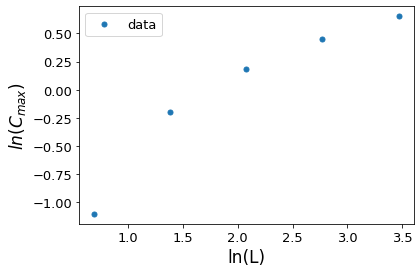

In [12]:
Qmax_2_c = max(MC_seq_2_list[2])
Qmax_4_c = max(MC_seq_4_list[2])
Qmax_8_c = max(MC_seq_8_list[2])
Qmax_16_c = max(MC_seq_16_list[2])
Qmax_32_c = max(MC_seq_32_list[2])

ln_Qmax_2_c = np.log(Qmax_2_c)
ln_Qmax_4_c = np.log(Qmax_4_c)
ln_Qmax_8_c = np.log(Qmax_8_c)
ln_Qmax_16_c = np.log(Qmax_16_c)
ln_Qmax_32_c = np.log(Qmax_32_c)

slope_c, b = polyfit(lnL, [ln_Qmax_2_c, ln_Qmax_4_c, ln_Qmax_8_c, ln_Qmax_16_c, ln_Qmax_32_c], 1)
print('Fitting curve y = ', round(slope_c, 4), 'x ', round(b, 4))

lnC = []
for i in [np.log(2), np.log(4), np.log(8), np.log(16), np.log(32)]:
    lnC.append(slope_c*i+b)

plt.plot(lnL, [ln_Qmax_2_c, ln_Qmax_4_c, ln_Qmax_8_c, ln_Qmax_16_c, ln_Qmax_32_c], 'o', markersize = 5, label = 'data')
plt.xlabel('ln(L)', fontsize = 17)
plt.ylabel(r'$ln(C_{max})$', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc = 'best', fontsize = 13)
plt.show()

## ln(L) v.s. Q$_{\textbf{max}}$

Fitting curve y =  0.5661349404089061 x  -0.008530093287590685


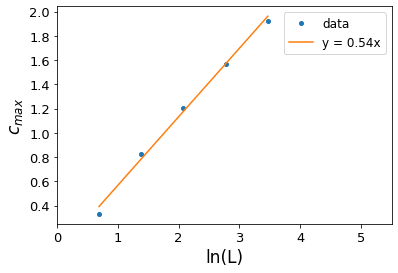

<Figure size 720x1440 with 0 Axes>

In [83]:
slope_c, b = polyfit(lnL, [Qmax_2_c, Qmax_4_c, Qmax_8_c, Qmax_16_c, Qmax_32_c], 1)
print('Fitting curve y = ', slope_c, 'x ', b)
    
slope_c = [slope_c*x for x in lnL]

plt.plot(lnL, [Qmax_2_c, Qmax_4_c, Qmax_8_c, Qmax_16_c, Qmax_32_c], 'o', markersize = 4, label = 'data')
plt.plot(lnL, slope_c, label = 'y = 0.54x')
plt.xlim(0, 5.5)
plt.xlabel('ln(L)', fontsize = 17)
plt.ylabel(r'$c_{max}$', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc = 'best', fontsize = 12)
plt.figure(figsize = (10, 20))
plt.show()